<a href="https://colab.research.google.com/github/UmutAygul/Globalhub/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gerekli Kütüphanelerin Eklenmesi

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("insurance.csv")
df.head()
#Read the file

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()
#incele non mu col-row gör
print()
df.corr().charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

# Keşifsel Veri Analizi Yapılması

Sigara içenlerin:  32050.23183153284
Sigara içmeyenlerin:  8434.268297856204


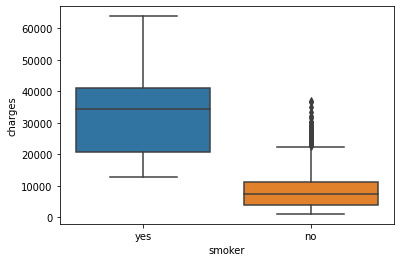

In [9]:
# Smoker - Charges
print("Sigara içenlerin: ",df.charges.loc[df.smoker== "yes"].mean())
print("Sigara içmeyenlerin: ",df.charges.loc[df.smoker== "no"].mean())
sns.boxplot(x = df.smoker, y = df.charges)


58 91 67 58


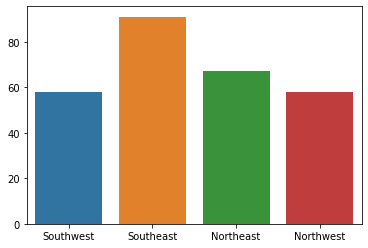

In [21]:
# Smoker - Region
df.smoker.replace(("yes","no"),(1,0), inplace = True)
sw = df.smoker.loc[df.region == "southwest"].sum()
se = df.smoker.loc[df.region == "southeast"].sum()
nw = df.smoker.loc[df.region == "northwest"].sum()
ne = df.smoker.loc[df.region == "northeast"].sum()
print(sw,se,ne,nw)
a = [sw,se,ne,nw]
b = ["Southwest","Southeast","Northeast","Northwest"]
c = sns.barplot(x = b, y = a)
plt.savefig("Smoker-Region.png")

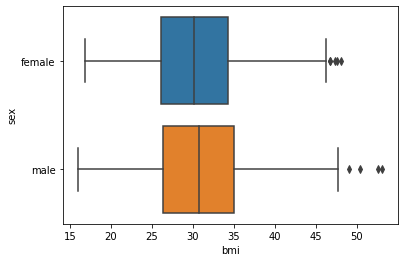

In [22]:
# BMI - SEX 
sns.boxplot(x = df.bmi, y = df.sex)
plt.savefig("BMI - SEX.png")

   southwest  southeast  northwest  northeast
0        371        382        373        339
*************************************************
 382 tane çocukla Southeast en çok cocuga sahip


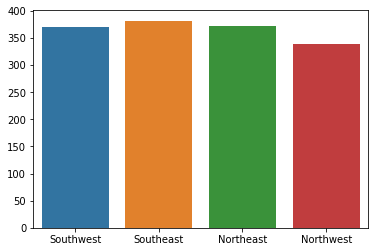

In [25]:
# Children - Region
sw_ch = df.children.loc[df.region == "southwest"].sum()
se_ch = df.children.loc[df.region == "southeast"].sum()
nw_ch = df.children.loc[df.region == "northwest"].sum()
ne_ch = df.children.loc[df.region == "northeast"].sum()

rcValue = {"southwest": [sw_ch],
     "southeast": [se_ch], 
    "northwest": [nw_ch], 
    "northeast": [ne_ch]}
print(pd.DataFrame(rcValue))

a = [sw_ch,se_ch,nw_ch,ne_ch]
b = ["Southwest","Southeast","Northeast","Northwest"]
sns.barplot(x = b,y = a)
plt.savefig("Children - Region.png")

# bölgelere göre cocuk saıysı
rcData = {"Southwest" : sw_ch ,"Southeast" :se_ch ,"Northwest" : nw_ch,"Northeast" : ne_ch}
for i in rcData.items():
    if i[1] == max(rcData.values()):
        print(f'*************************************************\n {i[1]} tane çocukla {i[0]} en çok cocuga sahip')

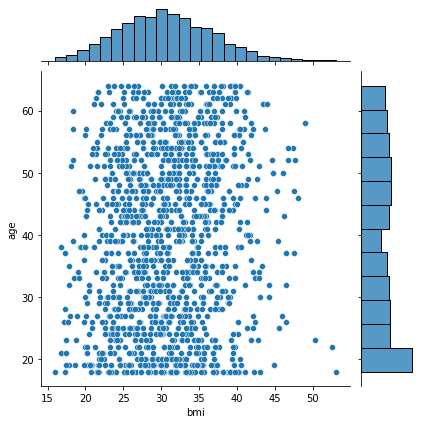

In [26]:
# Age - BMI
a =sns.jointplot(x=df.bmi,y=df.age)
a.savefig("a.png")

There is outlier in the table


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


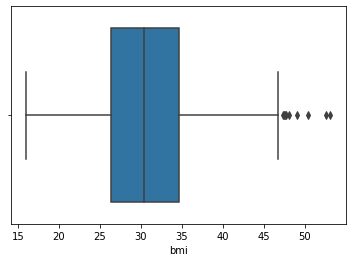

In [28]:
#BMI Outlier
sns.boxplot(df.bmi)
print("There is outlier in the table")

0 tane çocuk için ortalama: 30.550296167247385
1 tane çocuk için ortalama: 30.623148148148147
2 tane çocuk için ortalama: 30.978104166666665
3 tane çocuk için ortalama: 30.684331210191086
4 tane çocuk için ortalama: 31.391199999999998
5 tane çocuk için ortalama: 29.605


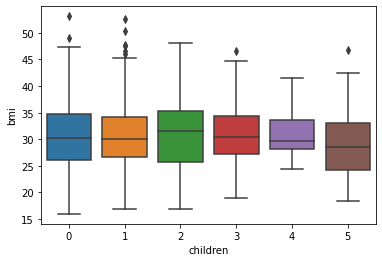

In [31]:
# Children - BMI
for i in range(6):   
    print(f"{i} tane çocuk için ortalama:", df.bmi.loc[df.children== i].mean())

sns.boxplot(x=df.children, y=df.bmi) 
plt.savefig("Children - BMI.png")

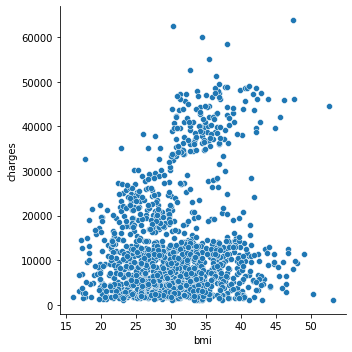

In [32]:
# BMI - Charges
sns.relplot(x = df.bmi, y = df.charges)

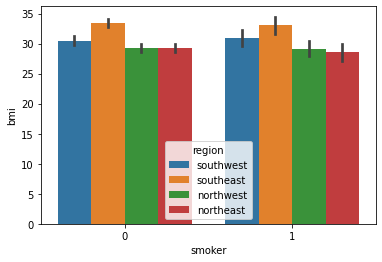

In [33]:
# Region - Smoker - BMI 
sns.barplot(x = df.smoker,y = df.bmi,hue = df.region)
plt.savefig("Region - Smoker - BMI.png")


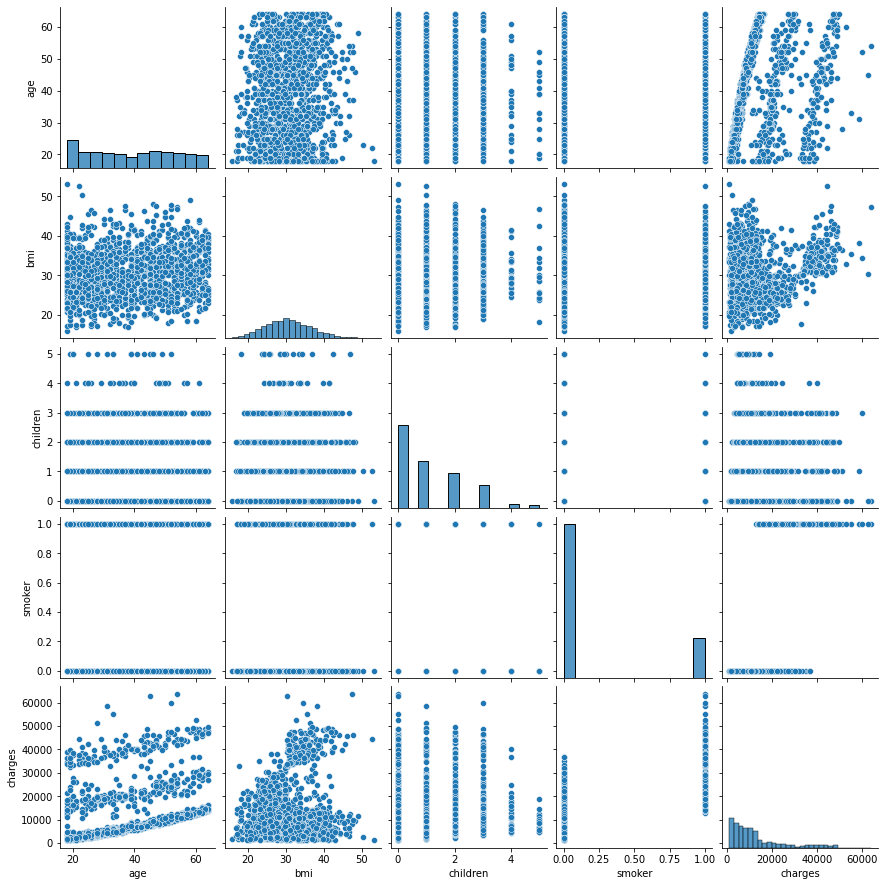

In [34]:
# All Features
sns.pairplot(df)

# 4.Veri Ön İşleme Yapılması 

In [38]:
# Data Preparation
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
def data_prep():
    labele = LabelEncoder()
    df["smoker"] = labele.fit_transform(df["smoker"])
    df["region"] = labele.fit_transform(df["region"])
    df["sex"] = labele.fit_transform(df["sex"])
    df.head()
    df.corr()["charges"]
    print(df)

data_prep()

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


# Model Seçme - Hiperparametre Optimizasyonu - Modeli Değerlendirme

In [39]:
# Train - Test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
y = df.charges
X = df.drop(["charges"], axis =1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head()

,age,sex,bmi,children,smoker,region
693,24.0,1.0,23.655,0.0,0.0,1.0
1297,28.0,0.0,26.510,2.0,0.0,2.0
634,51.0,1.0,39.700,1.0,0.0,3.0
1022,47.0,1.0,36.080,1.0,1.0,2.0
178,46.0,0.0,28.900,2.0,0.0,3.0


In [40]:
# Normalizasyon
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_normed = mms.fit_transform(X_train) 
#Eğitim setine normalizasyon uygulamak
X_test_normed= mms.transform(X_test) 
#Test setine normalizasyon uygulamak 

from sklearn.model_selection import train_test_split
y = df["charges"]
X = df.drop(["charges"],axis=1)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [50]:
# Prediction
from math import remainder
from optparse import Values
from statistics import mode
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
# !pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')


models = [LGBMRegressor,
          XGBRegressor,
          GradientBoostingRegressor,
          RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,
          SVR]
values = {"model ismi": [], "rmse" : [], "score" : []}
def modeling(df,y,alg):
    y = df[y]
    X = df.drop(["charges"], axis=1)
    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)

    accuracy = r2_score(y_test,y_pred)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    model_name = alg.__name__
    print(model_name, rmse, accuracy)
    values["model ismi"].append(model_name)
    values["rmse"].append(rmse)
    score = cross_val_score(alg(), X_train, y_train, cv=10).mean()
    values["score"].append(score)
      
def hyperparameter_optimization(df,y,alg):
    y = df[y]
    X = df.drop(["charges"],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    
    model = alg().fit(X_train,y_train)
    y_pred = model.predict(X_test)
    gbm_params = {"learning_rate": [0.001,0.1,0.01],
              "max_depth": [3,5,8],
              "n_estimators": [100,200,500],
              "subsample": [1,0.5,0.8],
              "loss": ["ls","lad","quantile"]}


    tuned_model = alg( learning_rate= 0.01, loss = 'ls', max_depth= 3, n_estimators= 500, subsample= 0.8).fit(X_train,y_train)
    y_pred_tuned = tuned_model.predict(X_test)
    accuracy_tuned = r2_score(y_test,y_pred_tuned)
    print("Tuned MSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("Tuned MAE:",mean_absolute_error(y_test, y_pred))
    print("Tuned Accuracy:",accuracy_tuned)
    deneme = np.array([19,0,27.9,0,1,3]).reshape(1,-1)
    print("Predicted value:", model.predict(deneme), "Reel value: 16884")

def main():
    for i in models:
        modeling(df, "charges", i )
    hyperparameter_optimization(df,"charges",GradientBoostingRegressor)
    print(pd.DataFrame(values).sort_values(by="rmse"))
if __name__ == "__main__":
    print("Transaction started...")
    main()

Transaction started...
LGBMRegressor 4745.349370787484 0.8463380291097209
[19:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 4511.858152847374 0.8610876400455157
[19:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:s